In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['month_name']=df['job_posted_date'].dt.month_name()

**Likelihood Of Skills Requested In US**

In [ ]:
# Change Job Skills from String to List

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [139]:
# Explode the Job skills Column 
# Set Job Country US
df_country = df[df['job_country']=='United States']
df_exp = df_country.explode('job_skills').copy()


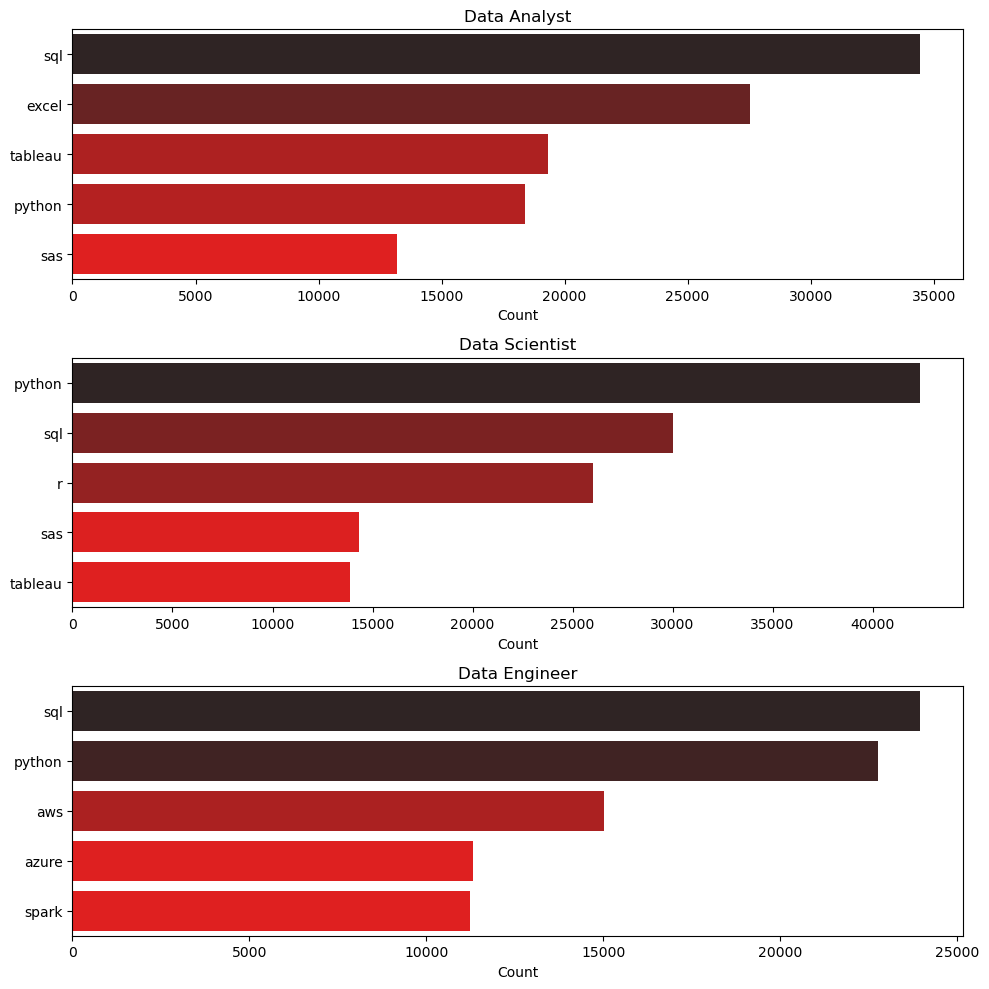

In [147]:
# User Input for Top X Job Titles


# Number = int(input('Enter the Number of Top Jobs You Want : '))
top_jobs = df_country['job_title_short'].value_counts().head(3).index


# final Plotting Of All Charts In Subplots


fig , ax = plt.subplots(len(top_jobs),1, figsize=(10,10))
for i , job in enumerate(top_jobs) :
    df_jobs = df_exp[df_exp['job_title_short']==job]
    df_final= df_jobs.groupby('job_skills').size().sort_values(ascending=False).head(5).reset_index(name='count')
    sns.barplot(data=df_final , x='count' , y ='job_skills' , ax=ax[i] , hue='count' , palette='dark:r_r' , legend=False)
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('')
    ax[i].set_title(job)

fig.tight_layout()

**Percentage Instead Of Count**

In [151]:
# DataFrame with Skills and jobs And Count of The Skills Per job Title

df_skill_count = df_exp.groupby(['job_skills','job_title_short']).size().reset_index(name='skill_count').sort_values(by='skill_count', ascending=False)

In [152]:
# To Find the Top Jobs In Count In US

total_job_count = df[df['job_country']=='United States']['job_title_short'].value_counts().reset_index(name='job_count')

In [153]:
# Merges the two columns together

df_final_jobs =pd.merge(df_skill_count , total_job_count , how='left' , on='job_title_short')


In [154]:
# To make a Percentage Column

df_final_jobs['Percentage_jobs'] = (df_final_jobs['skill_count']/df_final_jobs['job_count'])*100

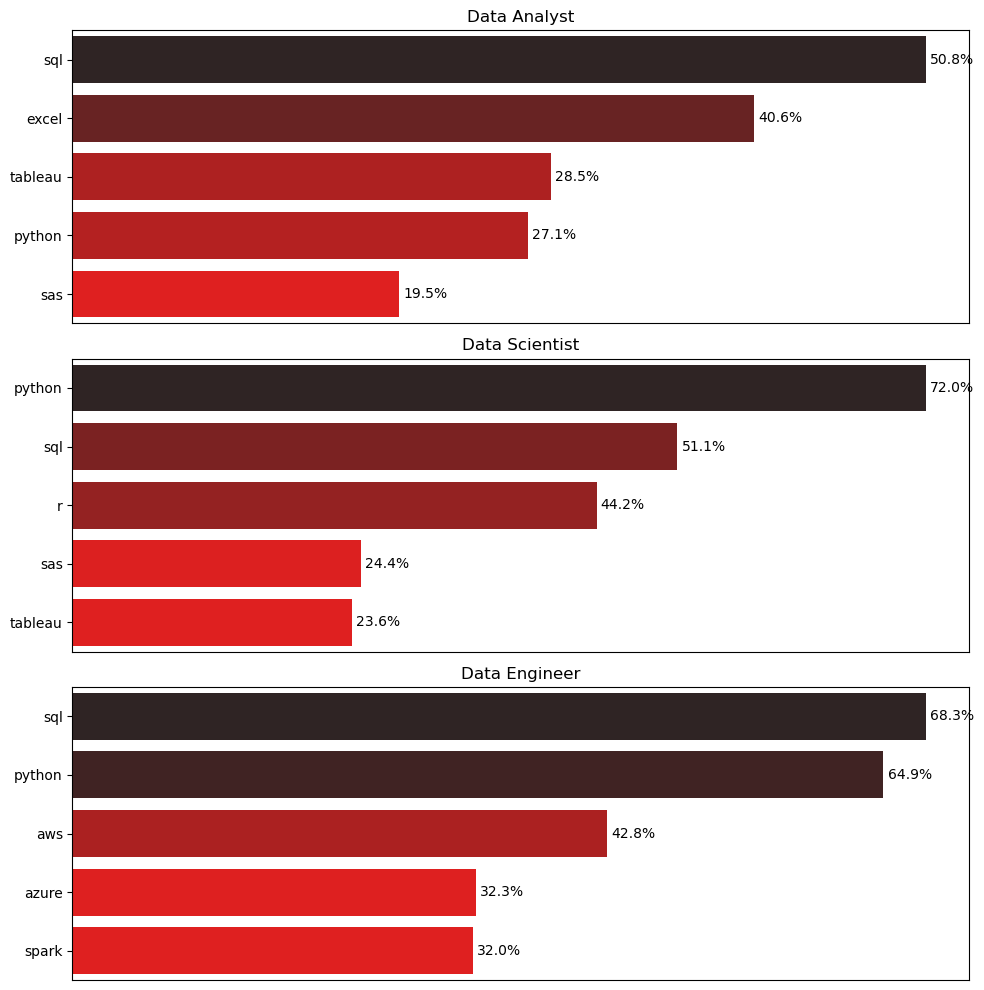

In [ ]:
# User Input for Top X Job Titles


Number = int(input('Enter the Number of Top Jobs You Want : '))

top_jobs = df_country['job_title_short'].value_counts().head(Number).index


# Final Chart Plotting

fig , ax = plt.subplots(len(top_jobs),1 , figsize=(10,10))
for i , job in enumerate(top_jobs):
    df_chart = df_final_jobs[df_final_jobs['job_title_short']==job]
    df_chart = df_chart.sort_values(by='skill_count', ascending=False).head(5)
    barplot=sns.barplot(data=df_chart , x='Percentage_jobs', y='job_skills', hue='Percentage_jobs', palette='dark:r_r', ax=ax[i],legend=False)
    ax[i].set_title(job)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

    # Add data labels to bars
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)
    ax[i].set_xticks([])

fig.tight_layout()

